In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [96]:
warnings.filterwarnings('ignore')
training_Data = pd.read_csv("mnist_train.csv")
training_Data.shape

(42000, 785)

In [14]:
print(training_Data.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [15]:
training_Data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
nparray = np.array(training_Data.values)
nparray


array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [116]:
X_data = nparray[:,1:]
Y_data = nparray[:,:1]


In [117]:
X_data.shape,Y_data.shape
print(Y_data)

[[1]
 [0]
 [1]
 ...
 [7]
 [6]
 [9]]


In [118]:
train_data = X_data.shape[0]*0.8
train_data = int(train_data)

In [119]:
X_trainData = X_data[:train_data,:]
Y_trainData = Y_data[:train_data]
X_testData = X_data[train_data:,:]
Y_testData = Y_data[train_data:]
print(X_trainData.shape)
print(Y_trainData.shape)
print(X_testData.shape)
print(Y_testData.shape)

(33600, 784)
(33600, 1)
(8400, 784)
(8400, 1)


In [120]:
X_trainData

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [121]:
Y_trainData

array([[1],
       [0],
       [1],
       ...,
       [0],
       [2],
       [2]], dtype=int64)

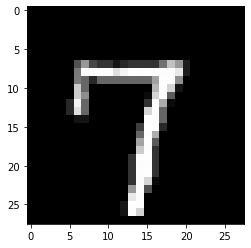

In [122]:
## visualize my dataSet

def drawImage(sample):
    img = sample.reshape((28,28))
    plt.imshow(img,cmap = 'gray')
    plt.show()
    
drawImage(X_trainData[6])

# KNN ALgorithm

In [129]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,queryPoint,k=5):
    
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))
        
    
    vals = sorted(vals)
    # Nearest/First K points
    vals = vals[:k]
    
    vals = np.array(vals)
    
    #print(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True)
    #print(new_vals)
    
    index = new_vals[1].argmax()
#     print(index)
    pred = new_vals[0][index]
    
    return pred
    
    

# Make Predictions

In [ ]:
# print(X_trainData)
# print(Y_trainData)
c = knn(X_trainData, Y_trainData, X_testData[3])
print(c[0])

drawImage(X_testData[3])


# Predict Accuracy

In [142]:
def accuracy(X_trainData,Y_trainData,X_testData,Y_testData):
    sum = 0
    for i in range(X_testData.shape[0]):
        if knn(X_trainData,Y_trainData,X_testData[i]) == Y_testData[i][0]:
            sum = sum + 1
    return (sum/X_testData.shape[0])*100

In [ ]:
accuracy(X_trainData,Y_trainData,X_testData,Y_testData)